![Demosaicking](https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion2/Images/poster_sesion2.png)

# **Hands-on Sesi√≥n 2.1: Image Demosaicking** üèûÔ∏è

Demosaicing (o de-mosaicing, demosaicking), tambi√©n conocido como reconstrucci√≥n de color, es un algoritmo de procesamiento de im√°genes digitales que se utiliza para reconstruir una imagen a todo color a partir de muestras de color incompletas generadas por un sensor de imagen superpuesto con una matriz de filtros de color (CFA), como un filtro Bayer. Tambi√©n se conoce como interpolaci√≥n CFA o debayering.

La mayor√≠a de las c√°maras digitales modernas adquieren im√°genes utilizando un √∫nico sensor de imagen superpuesto con un CFA, por lo que la demostraci√≥n es parte del proceso de procesamiento necesario para representar estas im√°genes en un formato visible.

Muchas c√°maras digitales modernas pueden guardar im√°genes en formato RAW (sin formato), lo que permite al usuario realizar una demostraci√≥n mediante software, en lugar de utilizar el firmware integrado de la c√°mara.

# Objetivo:
El objetivo de un algoritmo de demosaicking es reconstruir una imagen a todo color (es decir, un conjunto completo de tripletas de color) a partir de los canales de color espacialmente submuestreados emitidos por el CFA. El algoritmo debe tener las siguientes caracter√≠sticas:



*   Evitar la introducci√≥n de artefactos de color falso, como alias crom√°ticos, cremalleras (cambios bruscos y antinaturales de intensidad en varios p√≠xeles vecinos) y franjas moradas
*   M√°xima preservaci√≥n de la resoluci√≥n de la imagen
*   Baja complejidad computacional para un procesamiento r√°pido o una implementaci√≥n eficiente del hardware en la c√°mara
*   Facilidad de an√°lisis para una reducci√≥n precisa del ruido


![Demosaicking](https://drive.google.com/uc?id=1j3J5P2GZV_tHFzL7xJ8bNh9KnmL8Q1sX)




# Im√°genes RAW

Existen diferentes formatos de im√°genes tipo .RAW:

![RAW Image Formats](https://drive.google.com/uc?id=1Pi0NO8lyRgqadX6JTvALG-cx-JA471gH)



## **Contenido**

[**1. Llenando vacios**](#tema1)

[**2. Probemos con una imagen**](#tema2)

[**3. Hagamos demosaicking**](#tema3)

[**4. Correcciones de color**](#tema4)

librerias necesarias:

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2 as cv

descarguemos lo necesario

In [127]:
!wget https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/main/Sesiones/Sesion2/Imagenes/raw_GOPRO1.dng

--2024-04-15 19:59:04--  https://github.com/semilleroCV/Hands-on-Computer-Vision/raw/main/Sesiones/Sesion2/Imagenes/raw_GOPRO1.dng
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion2/Imagenes/raw_GOPRO1.dng [following]
--2024-04-15 19:59:05--  https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion2/Imagenes/raw_GOPRO1.dng
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14977972 (14M) [application/octet-stream]
Saving to: ‚Äòraw_GOPRO1.dng.2‚Äô

raw_GOPRO1.dng.2    100%[===================>]  14.28M  --.-K

## <font color='#4C5FDA'>**1. Llenando vacios**</font> <a name="tema1">


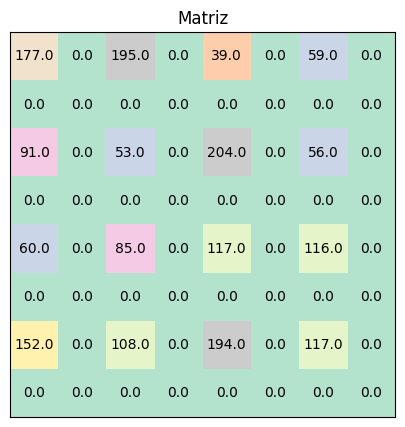

In [128]:
my_array = np.zeros((8, 8))
my_array[::2,::2] = np.random.randint(30, 255, (4, 4))

def plot_tensor_resul(tensor_a,  label_resul=""):
    plt.figure(figsize=(10, 5))
    plt.title("Matriz")
    plt.imshow(tensor_a, cmap="Pastel2")
    plt.xticks([])
    plt.yticks([])
    for (i, j), z in np.ndenumerate(tensor_a):
        plt.text(j, i, '{}'.format(z), ha='center', va='center')

a_plus_b = my_array

plot_tensor_resul(my_array)

## <font color="EB9A54"> **Reto No.1:** </font> Rellena los valores que son 0 en la matriz haciendo interpolacion

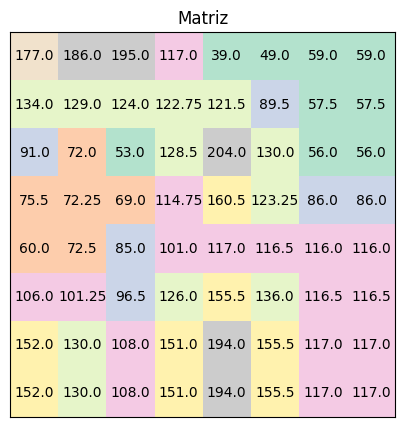

<Figure size 1200x500 with 0 Axes>

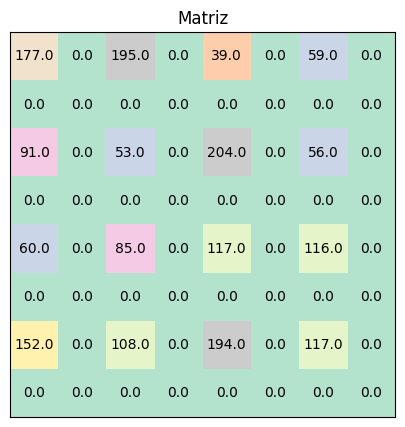

In [129]:
# Reto No.1:  Rellena los valores que son 0 en la matriz haciendo interpolacion
# Aqui tu codigo:
# Reto No.1:  Rellena los valores que son 0 en la matriz haciendo interpolacion
# Aqui tu codigo:
def fill_zeros_with_interpolation(matrix):
    # Crear una copia para modificar los valores
    interpolated_matrix = np.copy(matrix)
    rows, cols = matrix.shape

    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] == 0:
                # Determinar los l√≠mites de la submatriz 1.1
                r_min = max(0, i-1) # 0
                r_max = min(rows, i+2) # 3
                c_min = max(0, j-1) # 0
                c_max = min(cols, j+2) # 3

                # Extraer submatriz y calcular la media de los valores no cero
                sub_matrix = matrix[r_min:r_max, c_min:c_max]
                non_zero_values = sub_matrix[sub_matrix != 0]
                if non_zero_values.size > 0:
                    mean_value = np.mean(non_zero_values)
                    interpolated_matrix[i, j] = mean_value
                else:
                    # En caso de que todos los valores cercanos tambi√©n sean cero
                    interpolated_matrix[i, j] = 0

    return interpolated_matrix

my_array_inte = plot_tensor_resul(fill_zeros_with_interpolation(my_array))

plt.figure(figsize=(12, 5))
plot_tensor_resul(my_array, "Matriz original")
plt.show()

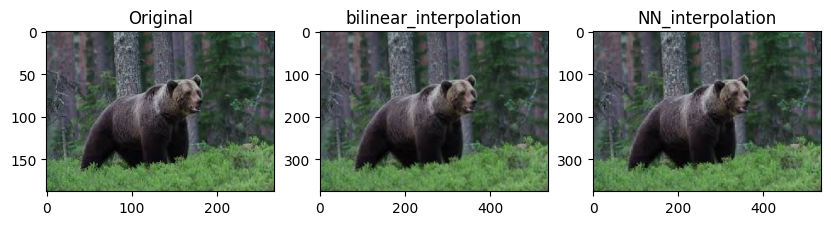

In [130]:
from PIL import Image
import requests
# Rta No.1:
# source:https://programmerclick.com/article/31811403992/
def BiLinear_interpolation(img,dstH,dstW):
    #dstH = img.shape[0] * 2
    #dstW = img.shape[1] * 2
    scrH,scrW,_=img.shape
    img=np.pad(img,((0,1),(0,1),(0,0)),'constant')
    retimg=np.zeros((dstH,dstW,3),dtype=np.uint8)
    for i in range(dstH):
        for j in range(dstW):
            scrx=(i+1)*(scrH/dstH)-1
            scry=(j+1)*(scrW/dstW)-1
            x=math.floor(scrx)
            y=math.floor(scry)
            u=scrx-x
            v=scry-y
            retimg[i,j]=(1-u)*(1-v)*img[x,y]+u*(1-v)*img[x+1,y]+(1-u)*v*img[x,y+1]+u*v*img[x+1,y+1]
    return retimg

def NN_interpolation(img,dstH,dstW):
    #agrandado de imagen
    scrH,scrW,_=img.shape
    retimg=np.zeros((dstH,dstW,3),dtype=np.uint8)
    for i in range(dstH):
        for j in range(dstW):
            scrx=round((i+1)*(scrH/dstH))
            scry=round((j+1)*(scrW/dstW))
            retimg[i,j]=img[scrx-1,scry-1]
    return retimg

url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcResE9MolPTJBjETxiolyXNAFZHJXuuXduiCpvlMkyF-g&s"
img = np.array(Image.open(requests.get(url, stream=True).raw))

bilinear_img = BiLinear_interpolation(img, img.shape[0] * 2, img.shape[1] * 2)
NN_img = NN_interpolation(img, img.shape[0] * 2, img.shape[1] * 2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(bilinear_img)
plt.title('bilinear_interpolation')

plt.subplot(1, 3, 3)
plt.imshow(NN_img)
plt.title('NN_interpolation')

plt.show()

## <font color='#4C5FDA'>**2. Probemos con una imagen**</font> <a name="tema2">


Vamos a usar una libreria especial para leer im√°genes RAW


In [131]:
!pip install -q rawpy

Importemos los paquetes necesarios para realizar el procesamiento

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import rawpy
from scipy.ndimage import filters

Leamos y mostremos una de las im√°genes RAW disponibles en nuestra carpeta

Leyendo imagen .RAW ...
Tama√±o de la imagen: (3000, 4000)


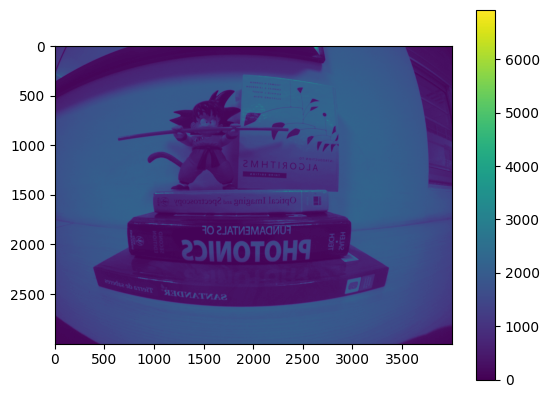

In [133]:
with rawpy.imread("raw_GOPRO1.dng") as raw:
    print('Leyendo imagen .RAW ...')
    image = raw.raw_image.copy()


print(f'Tama√±o de la imagen: {image.shape}')
plt.imshow(image)
plt.colorbar()
plt.show()

## <font color= "52F17F"> **Hazlo tu mismo N¬∫1:**  </font>  Haz plot de difernetes zonas de la imagen

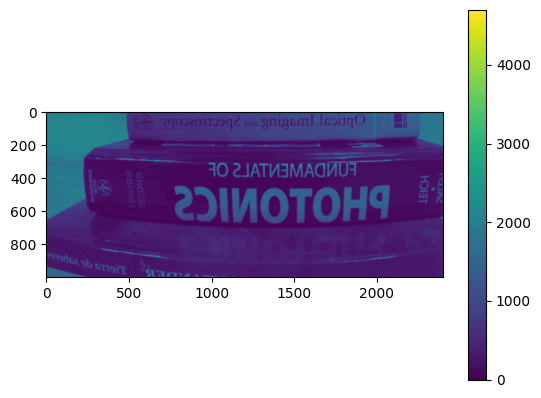

In [134]:
# Enfocandonos en una regi√≥n particular
plt.imshow(image[1500:2500, 500:2900]) # cambia esto!
plt.colorbar()
plt.show()

Hagamos Zoom para ver el patr√≥n Bayer

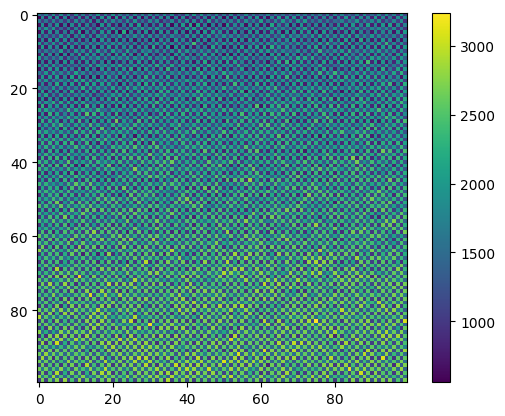

In [135]:
plt.imshow(image[310:410, 1405:1505]) # cuales serian los valoes para enfocar el logo de internet explorer?

plt.colorbar()
plt.show()

## <font color='#4C5FDA'>**3. Hagamos demosaicking**</font> <a name="tema3">

Comenzaremos separando el canal √∫nico en tres canales de colores diferentes: rojo, verde y azul (RGB).

## <font color="EB9A54"> **Reto No.2:** </font> Separemos la matriz en 3 matrices, una con la informacion de cada canal

![link text](https://drive.google.com/uc?id=1Y9eIFwS0nMxZ80ngaqTHXNPXTJ8Nx96C)

In [153]:
RED = 0
GREEN = 1
BLUE = 2
def get_cfa_channel(i, j):
    # CR2 CFA Pattern: [Red   , Green] <-- even rows: 0, 2, 4, ...
    #                  [Green , Blue]  <-- odd  rows: 1, 3, 5, ...
    if i % 2 == 0:  # Filas pares
        if j % 2 == 0:  # Columnas pares
            return RED
        else:
            return GREEN
    else:  # Filas impares
        if j % 2 == 0:  # Columnas pares
            return GREEN
        else:
            return BLUE



In [154]:
get_cfa_channel(1,1)

2

In [155]:
def get_cfa_mask(shape):
    mask = np.zeros(shape)

    for i in range(shape[0]):
        for j in range(shape[1]):
            if (i % 2 == 0) and (j % 2 == 0):
                mask[i, j] = RED
            elif (i % 2 == 0) and (j % 2 == 1):
                mask[i, j] = GREEN
            elif (i % 2 == 1) and (j % 2 == 0):
                mask[i, j] = GREEN
            elif (i % 2 == 1) and (j % 2 == 1):
                mask[i, j] = BLUE
    return mask
    # return mask

In [156]:
cfa_mask = get_cfa_mask(image.shape)

In [157]:
cfa_mask.shape

(3000, 4000)

In [158]:
cfa_mask.dtype

dtype('float64')

In [159]:
print(cfa_mask) # que significa esa matriz?

[[0. 1. 0. ... 1. 0. 1.]
 [1. 2. 1. ... 2. 1. 2.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [1. 2. 1. ... 2. 1. 2.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 2. 1. ... 2. 1. 2.]]


In [160]:
print('Comenzando proceso de Demosaicking:')
print('Extrayendo filtros respecto a su posici√≥n...')
r_mask = (cfa_mask == RED)
g_mask = (cfa_mask == GREEN)
b_mask = (cfa_mask == BLUE)

print('Separando los diferentes canales de color...')
r = image * r_mask
g = image * g_mask
b = image * b_mask

Comenzando proceso de Demosaicking:
Extrayendo filtros respecto a su posici√≥n...
Separando los diferentes canales de color...


hagamos el plot!

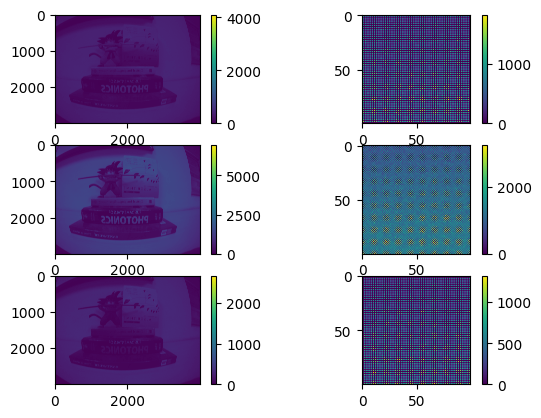

In [161]:
plt.subplot(3,2,1)
plt.imshow(r)
plt.colorbar()
plt.subplot(3,2,2)
plt.imshow(r[310:410, 1405:1505])
plt.colorbar()
#plt.show()

plt.subplot(3,2,3)
plt.imshow(g)
plt.colorbar()
plt.subplot(3,2,4)
plt.imshow(g[310:410, 1405:1505])
plt.colorbar()
#plt.show()

plt.subplot(3,2,5)
plt.imshow(b)
plt.colorbar()
plt.subplot(3,2,6)
plt.imshow(b[310:410, 1405:1505])
plt.colorbar()
#plt.show()

## <font color="EB9A54"> **Reto No.3:** </font> Rellenemos los huecos, ahora en toda la imagen

https://www.researchgate.net/publication/337699237/figure/fig1/AS:831856467509248@1575341445163/Standard-approach-to-demosaicing-CFA-20-images-Image-from-38.ppm

proceso demosaicing

<ipython-input-162-6e58a98660f4>:13: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  r =  filters.convolve(r, RB_KERNEL, mode='nearest')
<ipython-input-162-6e58a98660f4>:14: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  g = filters.convolve(g, RB_KERNEL, mode='nearest')
<ipython-input-162-6e58a98660f4>:15: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  b = filters.convolve(b, RB_KERNEL, mode='nearest')


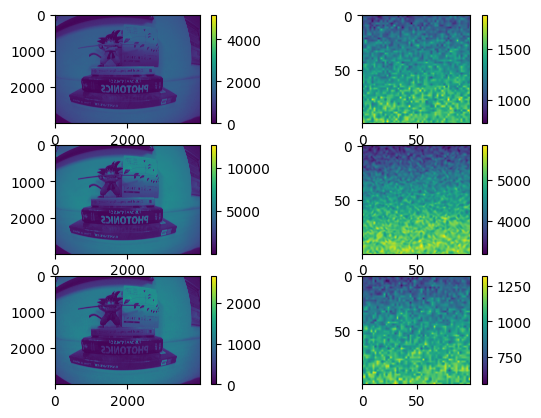

In [162]:
#Filtro lineal para el canal verde
G_KERNEL = np.array([[0, 1, 0],
                     [1, 4, 1],
                     [0, 1, 0]]) / 4.0


#Filtro lineal para los canales azul y rojo (Note la diferencia)
RB_KERNEL = np.array([[1, 2, 1],
                      [2, 4, 2],
                      [1, 2, 1]]) / 4.0

#
r =  filters.convolve(r, RB_KERNEL, mode='nearest')
g = filters.convolve(g, RB_KERNEL, mode='nearest')
b = filters.convolve(b, RB_KERNEL, mode='nearest')

plt.subplot(3,2,1)
plt.imshow(r)
plt.colorbar()
plt.subplot(3,2,2)
plt.imshow(r[310:410, 1405:1505])
plt.colorbar()

plt.subplot(3,2,3)
plt.imshow(g)
plt.colorbar()
plt.subplot(3,2,4)
plt.imshow(g[310:410, 1405:1505])
plt.colorbar()

plt.subplot(3,2,5)
plt.imshow(b)
plt.colorbar()
plt.subplot(3,2,6)
plt.imshow(b[310:410, 1405:1505])
plt.colorbar()

## <font color="EB9A54"> **Reto No.4:** </font> Agrupa las matrices

Agrupando canales para generar imagen RGB ...


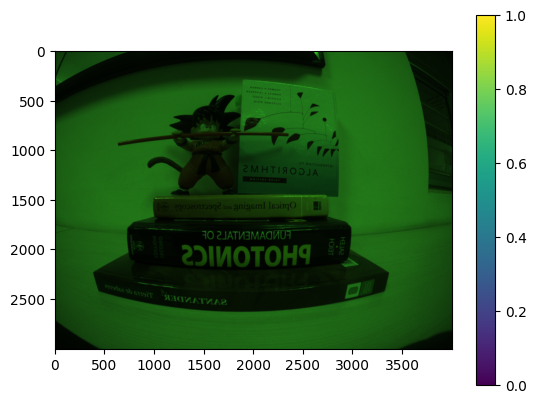

In [184]:
print('Agrupando canales para generar imagen RGB ...')

rgb = np.dstack((r, g, b))


plt.imshow(rgb / rgb.max()) # Normalizaci√≥n
plt.colorbar()
plt.show()

## <font color='#4C5FDA'>**4. Correcciones de color**</font> <a name="tema4">

Comenzaremos separando el canal √∫nico en tres canales de colores diferentes: rojo, verde y azul (RGB).


Ajustando el nivel de negro ...
Balanceando blancos ...


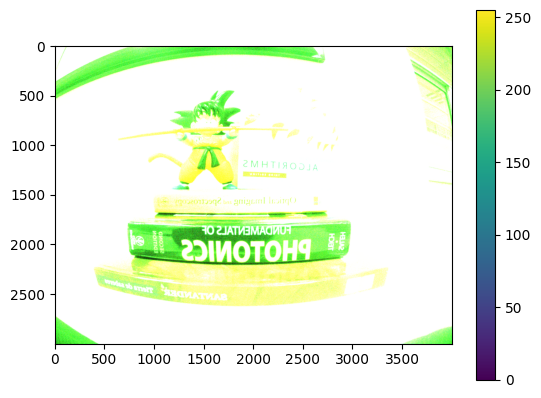

In [185]:
print('Ajustando el nivel de negro ...')
# resta el minimo valor de cada canal a cada canal
rgb -= np.array([np.min(rgb[:,:,0]), np.min(rgb[:,:,1]), np.min(rgb[:,:,2])])

print('Balanceando blancos ...')
###

plt.imshow(rgb)
plt.colorbar()
plt.show()

Nuevamente, este es un enfoque muy b√°sico, ya que no utilizamos ninguna de las estad√≠sticas del fabricante de la c√°mara ni la sensibilidad configurada con la que se captur√≥ la imagen.

Terminaremos con una correcci√≥n gamma (pronto la veremos) para enriquecer los colores.

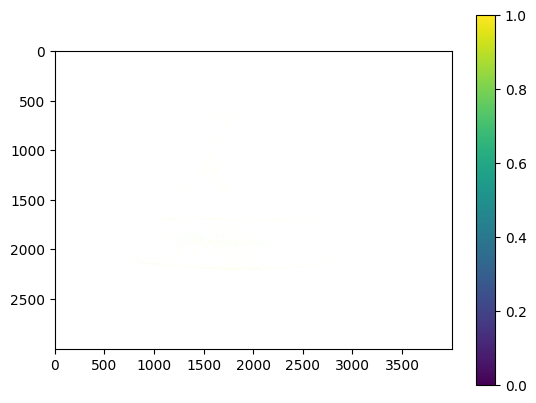

In [186]:
GAMMA = 0.2

# eleva la imagen a el valor gamma
rgb = rgb**GAMMA

plt.imshow(rgb)
plt.colorbar()
plt.show()

Carguemos la imagen .RAW nuevamente y ejecutemos un m√©todo avanzado (por defecto en el paquete `rawpy`).
¬øPuedes notar la diferencia?

In [ ]:
# Comparando contra la imagen original
with rawpy.imread('raw.CR2') as raw:
    print('Reading image raw data...')
    rgb2 = raw.postprocess(use_camera_wb=True)

plt.imshow(rgb2)

In [ ]:
print(rgb2.dtype)

uint8


como hacen eso?, explora tu mismo el codigo en c++ !
[link al codigo](https://github.com/LibRaw/LibRaw/blob/master/src/demosaic/misc_demosaic.cpp#L127)

![ASdasd](https://i.imgur.com/lmFdwBE.png)